## Module 1: Introduction

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

We'll use the same [NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records". 

Download the data for January and February 2022.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Q1: Downloading the data

In [2]:
df = pd.read_parquet("yellow_tripdata_2022-01.parquet")

In [3]:
len(df.columns)

19

### Q2: Computing duration

In [4]:
df["duration"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
df["duration"] = df["duration"].apply(lambda x: x.total_seconds() / 60)

In [5]:
df["duration"].mean(), df["duration"].std()

(14.212202918831741, 46.44530513776499)

### Q3: Dropping outliers

In [6]:
100 * df[(df["duration"]>=1) & (df["duration"]<=60)].shape[0] / df.shape[0]

98.27547930522405

In [7]:
df = df[(df["duration"]>=1) & (df["duration"]<=60)].copy()

### Q4: One-hot encoding

In [8]:
numerical_features = ["trip_distance"]
categorical_features = ["PULocationID", "DOLocationID"]

In [9]:
df[categorical_features] = df[categorical_features].astype(str)

In [10]:
train_dicts = df[numerical_features + categorical_features].to_dict(orient="records")

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = "duration"
y_train = df[target].values

In [11]:
len(dv.feature_names_)

516

### Q5: Training a model

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_train_pred = lr.predict(X_train)

In [14]:
mean_squared_error(y_train, y_train_pred, squared=False)

7.001496179484843

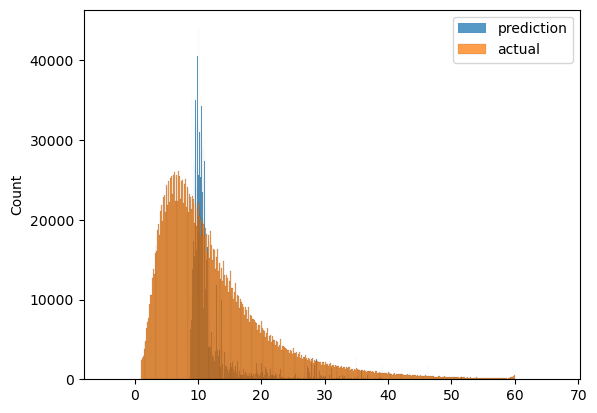

In [15]:
sns.histplot(y_train_pred, label="prediction")
sns.histplot(y_train, label="actual")

plt.legend()
plt.show()

### Q6: Evaluating the model

In [16]:
def read_and_prep_data(filename):
    df = pd.read_parquet(filename)
    
    df["duration"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
    df["duration"] = df["duration"].apply(lambda x: x.total_seconds() / 60)
    
    df = df[(df["duration"]>=1) & (df["duration"]<=60)].copy()
    
    df[categorical_features] = df[categorical_features].astype(str)
    
    return df

In [17]:
df_val = read_and_prep_data("yellow_tripdata_2022-02.parquet")

In [18]:
val_dicts = df_val[numerical_features + categorical_features].to_dict(orient="records")
X_val = dv.transform(val_dicts)

y_val = df_val[target].values

In [19]:
y_val_pred = lr.predict(X_val)

In [20]:
mean_squared_error(y_val, y_val_pred, squared=False)

7.79549784376655

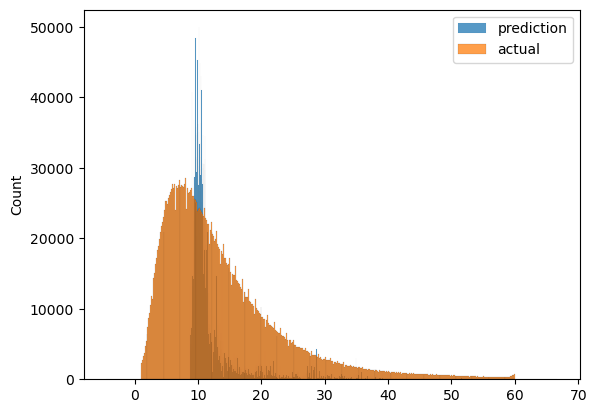

In [21]:
sns.histplot(y_val_pred, label="prediction")
sns.histplot(y_val, label="actual")

plt.legend()
plt.show()